<a href="https://colab.research.google.com/github/jadepanths/Python-PyTorch-Tutorial/blob/main/Datasets_and_Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets & Dataloaders
Processing data samples. PyTorch provides operators that help readability and modularity. You can use pre-loaded datasets provided by PyTorch or your own datasets. **Dataset** stores the samples and their corresponding labels while **DataLoader** wraps an iterable around the **dataset** to enable easy access to the samples. **DataLoader** comes into handy when the datasets become prominent and are required to be loaded into memory at once.  **DataLoader** parallelizes the data loading process with the support of automatic batching.

**DataLoader:** ```torch.utils.data.DataLoader```<br/>
**Dataset:** ```torch.utils.data.Dataset```


## Loading a Dataset

Here are examples from [PyTorch's Datasets/Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html), we are going to load a dataset from the **Fashion-MNIST** which is one of subclasses of ```torch.utils.data.Dataset```, [TORCHVISION.DATASETS](https://pytorch.org/vision/stable/datasets.html#fashion-mnist).

**Parameters**<br/>
```root``` is the path where the train/test data is stored. <br/>
```train``` specifies training or test dataset. <br/>
```downlad=true``` downloads the data from the internet if it's not avaliable at ```root```. <br/>
```transform``` and ```target_transform``` specify the featre and label transformations. <br/>

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

_output_
On a local machine, should look like this.
```
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!
```

## Iterating and Visualizing the Dataset
We can index Datasets manually like a list using ```training_data[index]```. We use **matplotlib** to render some samples in our training data.

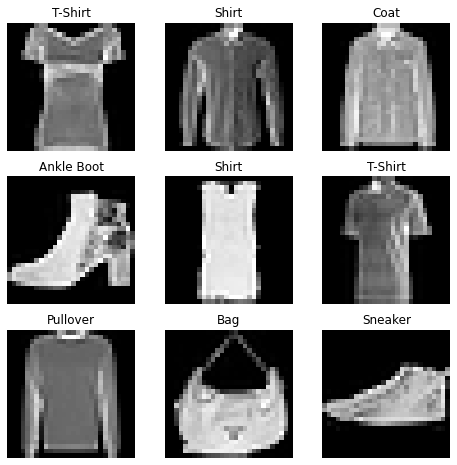

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating Custom Dataset
A custom Dataset must implement these three functions: ```__int__```, ```__len__```, abd ```__getitem__```.

An implementation from the FashionMNIST image are stored in a dirctory *img_dir*, and thier labels are stored sperately in a CSV file *annotations_file*. You can read the code [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files).

### ```__int__```
This function is a reseved method. It is called as a constructor in object oriented terminology. We initialize the directory containing the images, the annotations file, and both transforms.

### ```__len__```
return the number of sameples in our dataset.

### ```__getitem__```
This function loads and returns a sample from the dataset at a given index.
Based on the index, it identifies the image's location on disk, converts that to a tensor using ```read_image```, retrieves the corresponding label from the cvs data, calls the transform functioins on them(if applicable), and returns the tensor image and corresponding label in a tuple.


## Preparing Data for training with DataLoaders
The *Dataset* retrieves our dataset's features and labels one sample at a time, We can use python's multiprocessing to speed up data retrieval. We also want to pass samples in minibatches, reshuffle the data at every epoch to reduce model overfitting. <br/>

__Note:__ Overfitting is an error that occurs in data modeling as a result of a particular function aligning too closely to a minimal set of data points (overely complex model).

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader
Once we have loaded the dataset into the _Dataloader_, we can iterate through the dataset. Each iteration below returns a batch of *train_feature* and *train_labels*. When spicifying _shuffle=true_, we shuffle all the data after the iteration is over.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


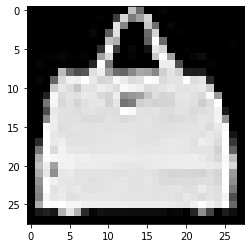

Label: 8


In [6]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")